### Pre-process the Data Set (normalization, grayscale, etc.)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import cv2

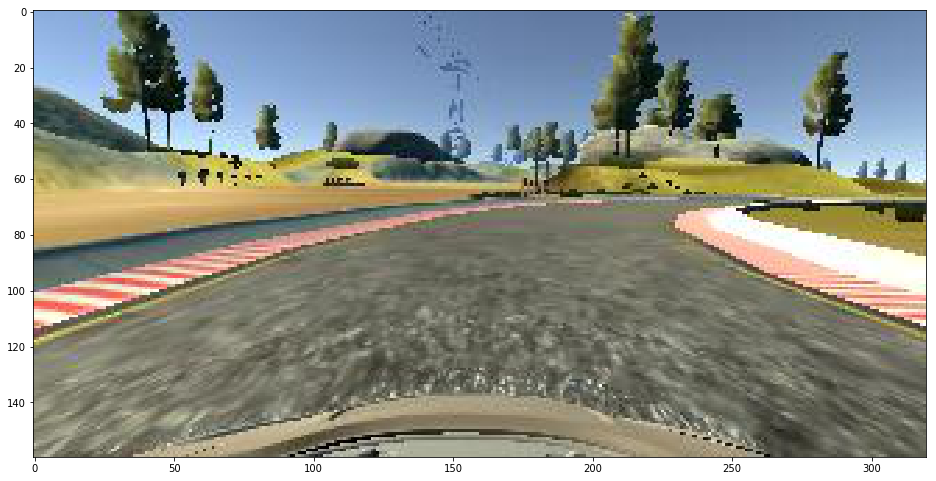

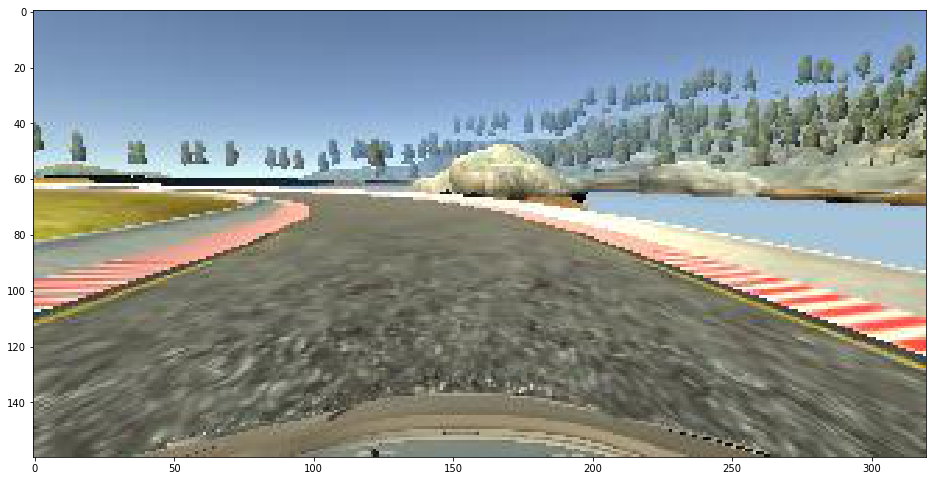

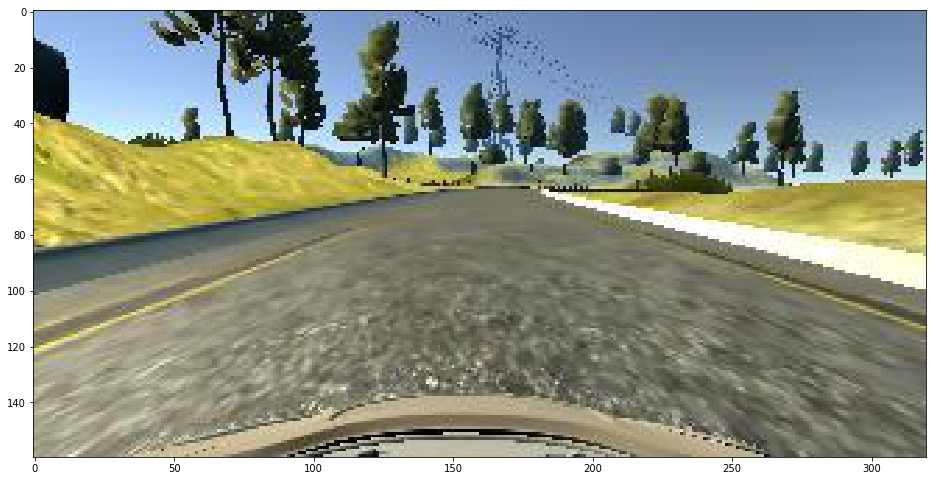

In [2]:
path = './data/IMG/'
filenames = ['center_2016_12_01_13_33_45_217.jpg', 'center_2016_12_01_13_33_54_272.jpg', 'center_2016_12_01_13_33_59_244.jpg']

steer = [0.406227, -0.2306556, 0]
images = []
for file_name in filenames:
    file_path = path + file_name
    img = cv2.imread(file_path) #cv2 read in images as BGR (not RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    fig, ax = plt.subplots(figsize = (16,9))
    ax.imshow(img)
    
    images.append(img)

In [3]:
# convert to numpy arrays for Keras
X_train = np.array(images)
y_train = np.array(steer)

In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers import Convolution2D
from keras.layers.pooling import MaxPooling2D


In [11]:
model = Sequential()
model.add(Lambda(lambda x : x/255. - 0.5, input_shape = (160, 320, 3)))
#model.add(Cropping2D(cropping = ((70, 25), (0, 0))))
# 3 @ 1x1 filter to choose color space automatically
model.add(Convolution2D(3, 1, 1, init = 'he_normal', activation = 'elu', border_mode = 'valid', name = 'conv0'))
#
model.add(Convolution2D(24, 5, 5, init = 'he_normal', subsample = (2, 2), border_mode = 'valid', activation = 'elu', name = 'conv1'))
model.add(Convolution2D(36, 5, 5, init = 'he_normal', subsample = (2, 2), border_mode = 'valid', activation = 'elu', name = 'conv2'))
model.add(Convolution2D(48, 5, 5, init = 'he_normal', subsample = (2, 2), border_mode = 'valid', activation = 'elu', name = 'conv3'))
model.add(Convolution2D(64, 3, 3, init = 'he_normal', subsample = (1, 1), border_mode = 'valid', activation = 'elu', name = 'conv4'))
model.add(Convolution2D(64, 3, 3, init = 'he_normal', subsample = (1, 1), border_mode = 'valid', activation = 'elu', name = 'conv5'))
model.add(Flatten())
model.add(Dense(100, init = 'he_normal', activation = 'elu', name = 'full1'))
model.add(Dense(50, init = 'he_normal', activation = 'elu', name = 'full2'))
model.add(Dense(10, init = 'he_normal', activation = 'elu', name = 'full3'))
model.add(Dense(1, init = 'he_normal', name = 'full4'))

In [15]:
model.compile(loss = 'mse', optimizer = 'adam')
model.fit(X_train, y_train, nb_epoch = 50) #, validation_split = 0.2, shuffle = True
y_pred = model.predict(X_train)
print(y_pred)

model.save('model.h5')

Epoch 1/50
3/3 [==============================] - 0s - loss: 0.0010
Epoch 2/50
3/3 [==============================] - 0s - loss: 6.3277
Epoch 3/50
3/3 [==============================] - 0s - loss: 46.9859
Epoch 4/50
3/3 [==============================] - 0s - loss: 524.4929
Epoch 5/50
3/3 [==============================] - 0s - loss: 1.3595
Epoch 6/50
3/3 [==============================] - 0s - loss: 0.7722
Epoch 7/50
3/3 [==============================] - 0s - loss: 1.6890
Epoch 8/50
3/3 [==============================] - 0s - loss: 0.7543
Epoch 9/50
3/3 [==============================] - 0s - loss: 0.0842
Epoch 10/50
3/3 [==============================] - 0s - loss: 0.0334
Epoch 11/50
3/3 [==============================] - 0s - loss: 0.1545
Epoch 12/50
3/3 [==============================] - 0s - loss: 0.1854
Epoch 13/50
3/3 [==============================] - 0s - loss: 0.1352
Epoch 14/50
3/3 [==============================] - 0s - loss: 0.0838
Epoch 15/50
3/3 [=======================